In [1]:
import os
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
import tensorflow as tf
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from PIL import Image
from PIL import UnidentifiedImageError

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
import itertools

import warnings
warnings.filterwarnings('ignore')

C:\Users\rohit\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rohit\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\rohit\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# datagen = ImageDataGenerator(
#         rotation_range=45,     #Random rotation between 0 and 45
#         width_shift_range=0.2,   #% shift
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.3,
#         horizontal_flip=True,
#         fill_mode='reflect') 

In [3]:
Healthy = os.listdir('C:/Users/rohit/Downloads/archive (3)/Healthy')
Mild = os.listdir('C:/Users/rohit/Downloads/archive (3)/Mild DR')
Moderate = os.listdir('C:/Users/rohit/Downloads/archive (3)/Moderate DR')
Proliferate = os.listdir('C:/Users/rohit/Downloads/archive (3)/Proliferate DR')
Severe = os.listdir('C:/Users/rohit/Downloads/archive (3)/Severe DR')

In [4]:
img_w, img_h = 256, 256
X = []
y = []

In [5]:
# x = x.reshape((1, ) + x.shape)  #Array with shape (1, 256, 256, 3)

# i = 0
# for batch in datagen.flow(x, batch_size=16,  
#                           save_to_dir='augmented', 
#                           save_prefix='aug', 
#                           save_format='png'):
#     i += 1
#     if i > 20:
#         break

In [6]:
for i in Healthy:
    try:
        img = Image.open("C:/Users/rohit/Downloads/archive (3)/Healthy/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(0)
    except UnidentifiedImageError:
        pass

In [7]:
for i in Mild:
    try:
        img = Image.open("C:/Users/rohit/Downloads/archive (3)/Mild DR/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        x=np.asarray(img)
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass

In [8]:
for i in Moderate:
    try:
        img = Image.open("C:/Users/rohit/Downloads/archive (3)/Moderate DR/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(2)
    except UnidentifiedImageError:
        pass

In [9]:
for i in Proliferate:
    try:
        img = Image.open("C:/Users/rohit/Downloads/archive (3)/Proliferate DR/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(3)
    except UnidentifiedImageError:
        pass

In [10]:
for i in Severe:
    try:
        img = Image.open("C:/Users/rohit/Downloads/archive (3)/Severe DR/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(4)
    except UnidentifiedImageError:
        pass

In [11]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

(7391, 256, 256, 3) (7391,)


In [12]:
x = X.astype('float32')
x /= 255

In [13]:
num_classes = 5

labels = keras.utils.to_categorical(y, num_classes)
print(labels[0])

[1. 0. 0. 0. 0.]


In [14]:
x_train1, x_test, y_train1, y_test = train_test_split(x, labels, test_size = 0.1, random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1,test_size=0.1,random_state=42)

print('Number of train: {}'.format(len(x_train)))
print('Number of validation: {}'.format(len(x_val)))
print('Number of test: {}'.format(len(x_test)))

Number of train: 5985
Number of validation: 666
Number of test: 740


In [15]:
len(x_train)

5985

In [16]:
# datagen = ImageDataGenerator(
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     rotation_range=20.,
#     width_shift_range=0.5,
#     height_shift_range=0.5,
#     shear_range=30.,
#     zoom_range=4.,
#     channel_shift_range=0.,
#     fill_mode='nearest',
#     cval=0.,
#     horizontal_flip=0.2,
#     vertical_flip=0.2,
#     rescale=None)

# datagen.fit(x_train)

In [17]:
base_model = tf.keras.applications.InceptionResNetV2(input_shape=(256,256,3),include_top=False,weights="imagenet",pooling='max')

In [18]:
for layer in base_model.layers[:-11]:
    layer.trainable=True

In [19]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 128)               196736    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                        

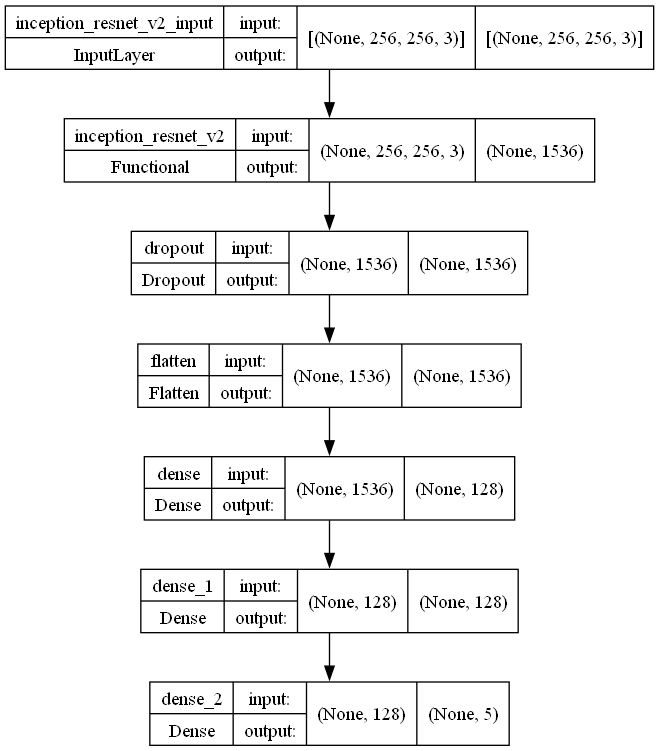

In [20]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [21]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 3*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [22]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [23]:
lrd = ReduceLROnPlateau(monitor = 'recall',patience = 10,verbose = 1,factor = 0.50, min_lr = 1e-7)
# es = EarlyStopping(verbose=1, patience=20,monitor='val_accuracy')

In [24]:
model.compile(optimizer='Adamax', loss = tf.keras.losses.CategoricalCrossentropy(),metrics=METRICS)

In [25]:
%time
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 50,verbose = 1,callbacks=[lrd],batch_size=16)

Wall time: 0 ns
Epoch 1/50
375/375 [==============================] - 83s 183ms/step - loss: 0.9404 - accuracy: 0.5975 - precision: 0.6739 - recall: 0.4899 - auc: 0.8864 - f1_score: 0.8327 - val_loss: 0.8158 - val_accuracy: 0.6562 - val_precision: 0.6924 - val_recall: 0.5916 - val_auc: 0.9180 - val_f1_score: 0.9570 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - 63s 169ms/step - loss: 0.6590 - accuracy: 0.7263 - precision: 0.7621 - recall: 0.6712 - auc: 0.9425 - f1_score: 1.0657 - val_loss: 0.7436 - val_accuracy: 0.7372 - val_precision: 0.7766 - val_recall: 0.6577 - val_auc: 0.9319 - val_f1_score: 1.0667 - lr: 0.0010
Epoch 3/50
375/375 [==============================] - 64s 170ms/step - loss: 0.5199 - accuracy: 0.7935 - precision: 0.8159 - recall: 0.7657 - auc: 0.9638 - f1_score: 1.1805 - val_loss: 0.6260 - val_accuracy: 0.7553 - val_precision: 0.7743 - val_recall: 0.7417 - val_auc: 0.9493 - val_f1_score: 1.1343 - lr: 0.0010
Epoch 4/50
375/375 [======================

375/375 [==============================] - 64s 170ms/step - loss: 0.0081 - accuracy: 0.9957 - precision: 0.9960 - recall: 0.9957 - auc: 0.9999 - f1_score: 1.4900 - val_loss: 0.8840 - val_accuracy: 0.8153 - val_precision: 0.8163 - val_recall: 0.8138 - val_auc: 0.9474 - val_f1_score: 1.2240 - lr: 2.5000e-04
Epoch 26/50
375/375 [==============================] - 64s 170ms/step - loss: 0.0072 - accuracy: 0.9953 - precision: 0.9963 - recall: 0.9945 - auc: 1.0000 - f1_score: 1.4893 - val_loss: 0.9021 - val_accuracy: 0.8243 - val_precision: 0.8241 - val_recall: 0.8228 - val_auc: 0.9483 - val_f1_score: 1.2361 - lr: 2.5000e-04
Epoch 27/50
375/375 [==============================] - 64s 171ms/step - loss: 0.0065 - accuracy: 0.9965 - precision: 0.9968 - recall: 0.9963 - auc: 1.0000 - f1_score: 1.4949 - val_loss: 0.8995 - val_accuracy: 0.8168 - val_precision: 0.8165 - val_recall: 0.8153 - val_auc: 0.9486 - val_f1_score: 1.2251 - lr: 2.5000e-04
Epoch 28/50
375/375 [==============================] - 

375/375 [==============================] - 61s 163ms/step - loss: 0.0049 - accuracy: 0.9970 - precision: 0.9975 - recall: 0.9965 - auc: 1.0000 - f1_score: 1.4916 - val_loss: 0.9588 - val_accuracy: 0.8318 - val_precision: 0.8331 - val_recall: 0.8318 - val_auc: 0.9445 - val_f1_score: 1.2497 - lr: 6.2500e-05
Epoch 50/50
375/375 [==============================] - 61s 164ms/step - loss: 0.0058 - accuracy: 0.9957 - precision: 0.9963 - recall: 0.9957 - auc: 1.0000 - f1_score: 1.4901 - val_loss: 0.9504 - val_accuracy: 0.8213 - val_precision: 0.8238 - val_recall: 0.8213 - val_auc: 0.9449 - val_f1_score: 1.2347 - lr: 6.2500e-05


In [26]:
score = model.evaluate(x_test, y_test,  verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8391891717910767


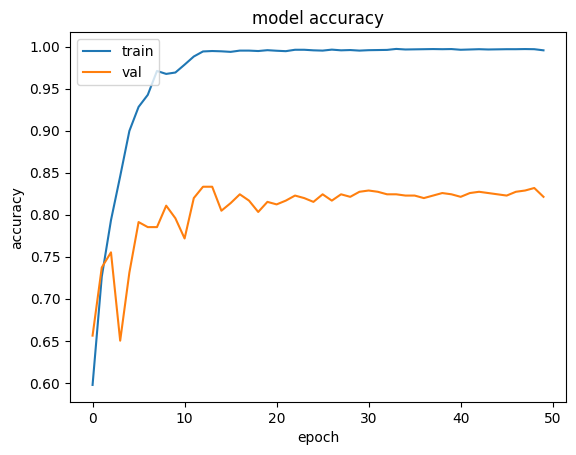

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

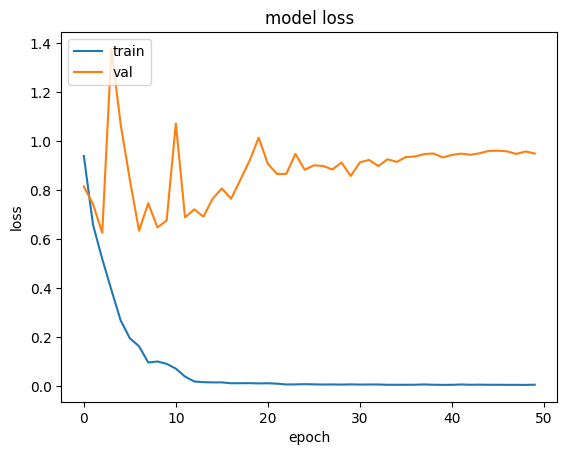

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

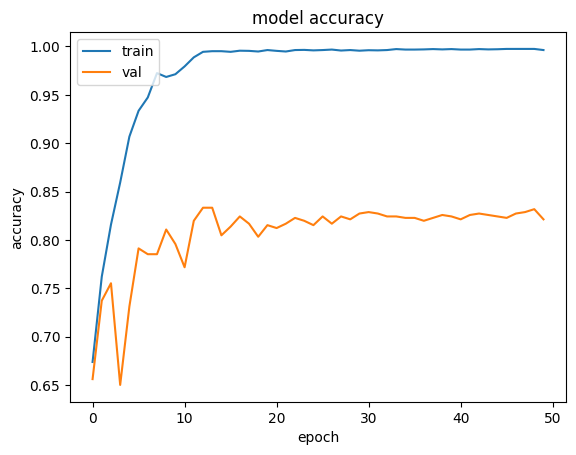

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['precision'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()